## Assignment 4 - Juan Esteban Rincón Poveda

### 01-introduction-geospatial-data

In [2]:
%matplotlib inline

import pandas as pd
import geopandas

In [3]:
stations = geopandas.read_file("data/paris_bike_stations_mercator.gpkg")

In [4]:
type(stations)

geopandas.geodataframe.GeoDataFrame

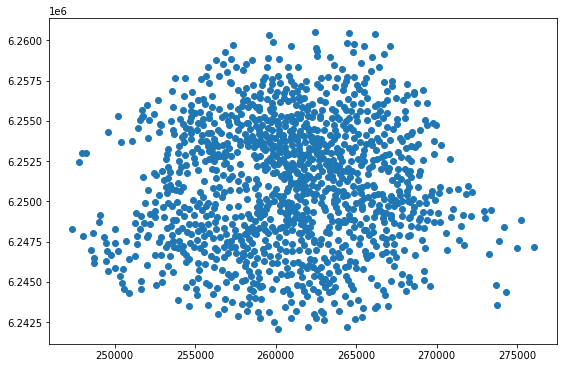

In [5]:
stations.plot(figsize=(12,6))

In [6]:
import contextily

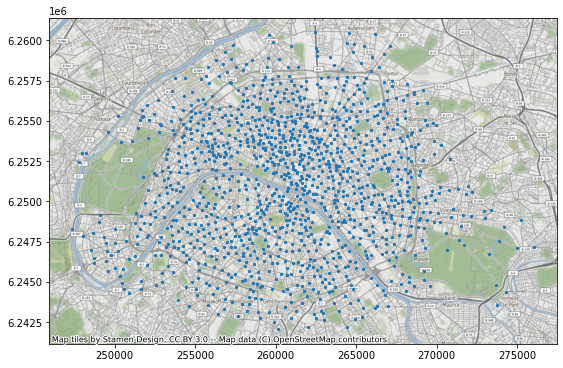

In [7]:
ax = stations.plot(figsize=(12,6), markersize=5)
contextily.add_basemap(ax)

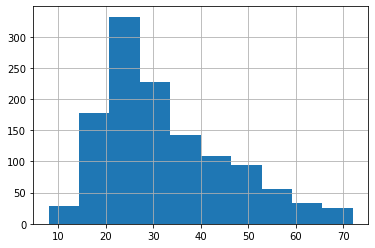

In [8]:
stations['bike_stands'].hist()

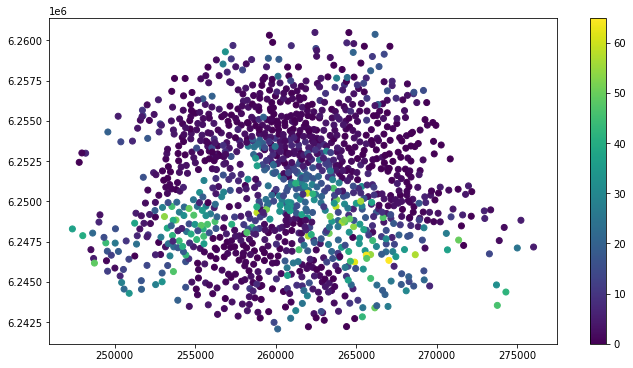

In [9]:
stations.plot(figsize=(12, 6), column='available_bikes', legend=True)

In [10]:
districts = geopandas.read_file("data/paris_districts_utm.geojson")

In [11]:
districts.shape

(80, 4)

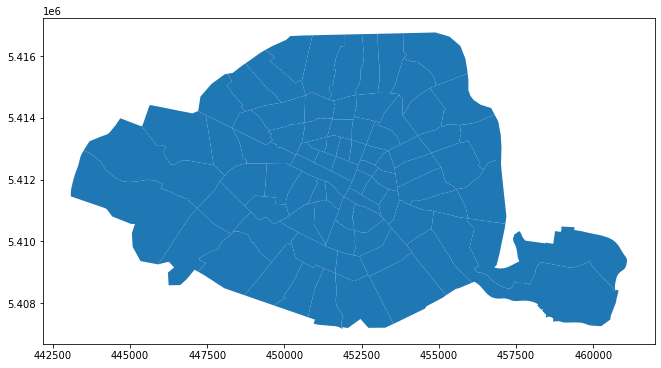

In [12]:
districts.plot(figsize=(12, 6))

In [13]:
districts.geometry.area

0     8.685379e+05
1     4.122371e+05
2     2.735494e+05
3     2.693111e+05
4     1.879097e+05
          ...     
75    1.294254e+06
76    8.061191e+05
77    1.486139e+06
78    1.598127e+06
79    2.089783e+06
Length: 80, dtype: float64

In [14]:
districts['area'] = districts.geometry.area / 1e6

In [15]:
districts.sort_values(by='area', ascending=False)

,id,district_name,population,geometry,area
45,46,Picpus,62947,"POLYGON ((456790.759 5408686.978, 456841.941 5...",7.201383
60,61,Auteuil,67967,"POLYGON ((444930.499 5411923.067, 444957.444 5...",6.380679
44,45,Bel-Air,33976,"POLYGON ((456987.121 5409120.599, 456996.502 5...",5.967841
61,62,Muette,45214,"POLYGON ((444686.860 5413985.234, 445358.893 5...",5.475037
62,63,Porte-Dauphine,27423,"POLYGON ((446548.869 5414236.010, 447025.036 5...",3.085061
...,...,...,...,...,...
9,10,Enfants-Rouges,8562,"POLYGON ((453580.220 5412266.849, 453591.609 5...",0.271603
3,4,Place-Vendôme,3044,"POLYGON ((451004.908 5412654.095, 450960.640 5...",0.269311
5,6,Vivienne,2917,"POLYGON ((451686.936 5412747.032, 451682.879 5...",0.243418
11,12,Sainte-Avoie,7501,"POLYGON ((452928.277 5412227.550, 452830.786 5...",0.213201


In [16]:
districts['population_density'] = districts['population'] / districts.geometry.area * 10**6

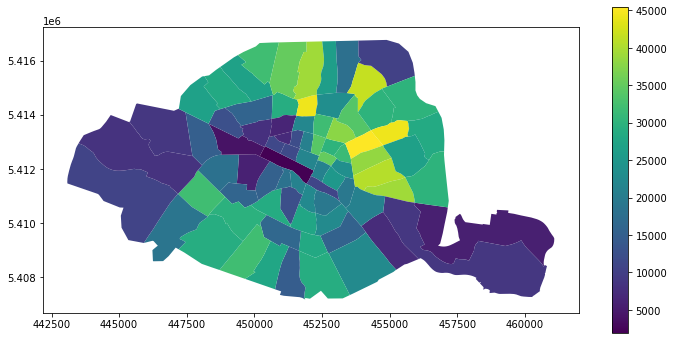

In [17]:
districts.plot(column='population_density', figsize=(12, 6), legend=True)

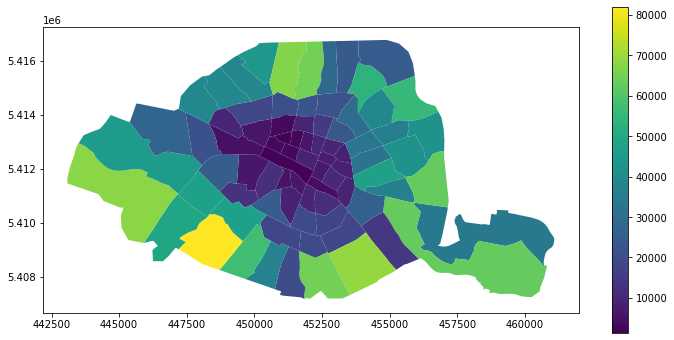

In [18]:
districts.plot(column='population', figsize=(12, 6), legend=True)

### 02-coordinate-reference-systems

In [19]:
districts2 = geopandas.read_file("data/paris_districts.geojson")

In [20]:
districts2.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [21]:
districts2.head()

,id,district_name,population,geometry
0,1,St-Germain-l'Auxerrois,1672,"POLYGON ((2.34459 48.85405, 2.34459 48.85405, ..."
1,2,Halles,8984,"POLYGON ((2.34937 48.86058, 2.34822 48.85852, ..."
2,3,Palais-Royal,3195,"POLYGON ((2.33947 48.86214, 2.33912 48.86148, ..."
3,4,Place-Vendôme,3044,"POLYGON ((2.33194 48.86491, 2.33135 48.86399, ..."
4,5,Gaillon,1345,"POLYGON ((2.33632 48.86797, 2.33587 48.86700, ..."


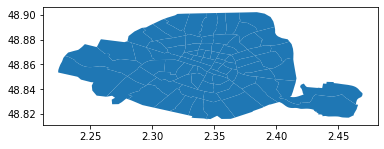

In [22]:
districts2.plot()

In [23]:
districts2.geometry.area

0     0.000107
1     0.000051
2     0.000034
3     0.000033
4     0.000023
        ...   
75    0.000159
76    0.000099
77    0.000182
78    0.000196
79    0.000256
Length: 80, dtype: float64

In [24]:
districts_RGF93 = districts2.to_crs(epsg=2154)

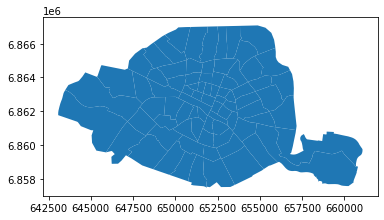

In [25]:
districts_RGF93.plot()

In [26]:
districts_RGF93.geometry.area

0     8.690007e+05
1     4.124585e+05
2     2.736968e+05
3     2.694568e+05
4     1.880122e+05
          ...     
75    1.294988e+06
76    8.065686e+05
77    1.486971e+06
78    1.599002e+06
79    2.090904e+06
Length: 80, dtype: float64

In [27]:
stations = geopandas.read_file("data/paris_bike_stations.geojson")
stations.head()

,name,bike_stands,available_bikes,geometry
0,14002 - RASPAIL QUINET,44,4,POINT (2.32956 48.83920)
1,20503 - COURS DE VINCENNES PYRÉNÉES,21,3,POINT (2.40591 48.84772)
2,20011 - PYRÉNÉES-DAGORNO,21,0,POINT (2.40517 48.85550)
3,31008 - VINCENNES (MONTREUIL),56,0,POINT (2.43737 48.85770)
4,43006 - MINIMES (VINCENNES),28,27,POINT (2.43079 48.84149)


In [28]:
stations_webmercator = stations.to_crs(epsg=3857)
stations.head()

,name,bike_stands,available_bikes,geometry
0,14002 - RASPAIL QUINET,44,4,POINT (2.32956 48.83920)
1,20503 - COURS DE VINCENNES PYRÉNÉES,21,3,POINT (2.40591 48.84772)
2,20011 - PYRÉNÉES-DAGORNO,21,0,POINT (2.40517 48.85550)
3,31008 - VINCENNES (MONTREUIL),56,0,POINT (2.43737 48.85770)
4,43006 - MINIMES (VINCENNES),28,27,POINT (2.43079 48.84149)


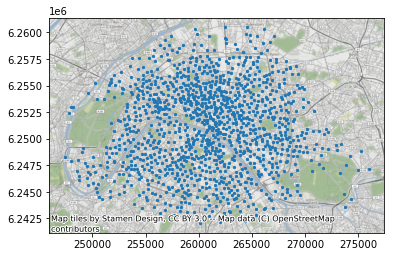

In [29]:
import contextily
ax = stations_webmercator.plot(markersize=5)
contextily.add_basemap(ax)

### 03-spatial-relationships-operations

#### Part 1

In [30]:
districts = geopandas.read_file("data/paris_districts.geojson").to_crs(epsg=2154)
stations = geopandas.read_file("data/paris_bike_stations.geojson").to_crs(epsg=2154)

In [31]:
from shapely.geometry import Point

In [32]:
eiffel_tower = Point(648237.3, 6862271.9)

In [33]:
district_montparnasse = districts.loc[52, 'geometry']
bike_station = stations.loc[293, 'geometry']

In [34]:
print(eiffel_tower.within(district_montparnasse))

False


In [35]:
print(district_montparnasse.contains(bike_station))

True


In [36]:
print(eiffel_tower.distance(bike_station))

3540.1534488921966


In [37]:
eiffel_tower = Point(648237.3, 6862271.9)

In [38]:
mask = districts.contains(eiffel_tower)
mask

0     False
1     False
2     False
3     False
4     False
      ...  
75    False
76    False
77    False
78    False
79    False
Length: 80, dtype: bool

In [39]:
districts[mask]

,id,district_name,population,geometry
27,28,Gros-Caillou,25156,"POLYGON ((649336.752 6861767.761, 649110.815 6..."


In [40]:
dist_eiffel = stations.distance(eiffel_tower)

In [41]:
dist_eiffel.min()

232.34672323454004

In [42]:
stations_eiffel = stations[dist_eiffel < 1000]

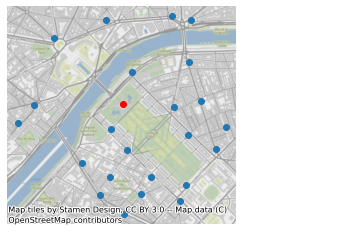

In [43]:
ax = stations_eiffel.to_crs(epsg=3857).plot()
geopandas.GeoSeries([eiffel_tower], crs='EPSG:2154').to_crs(epsg=3857).plot(ax=ax, color='red')
import contextily
contextily.add_basemap(ax)
ax.set_axis_off()

#### Part 2

In [45]:
s_seine = geopandas.GeoDataFrame.from_features({"type":"FeatureCollection","features":[{"type":"Feature","properties":{},"geometry":{"type":"LineString","coordinates":[[2.408924102783203,48.805619828930226],[2.4092674255371094,48.81703747481909],[2.3927879333496094,48.82325391133874],[2.360687255859375,48.84912860497674],[2.338714599609375,48.85827758964043],[2.318115234375,48.8641501307046],[2.298717498779297,48.863246707697],[2.2913360595703125,48.859519915404825],[2.2594070434570312,48.8311646245967],[2.2436141967773438,48.82325391133874],[2.236919403076172,48.82347994904826],[2.227306365966797,48.828339513221444],[2.2224998474121094,48.83862215329593],[2.2254180908203125,48.84856379804802],[2.2240447998046875,48.85409863123821],[2.230224609375,48.867989496547864],[2.260265350341797,48.89192242750887],[2.300262451171875,48.910203080780285]]}}]},
                                               crs={'init': 'epsg:4326'})

In [46]:
s_seine_utm = s_seine.to_crs(epsg=2154)

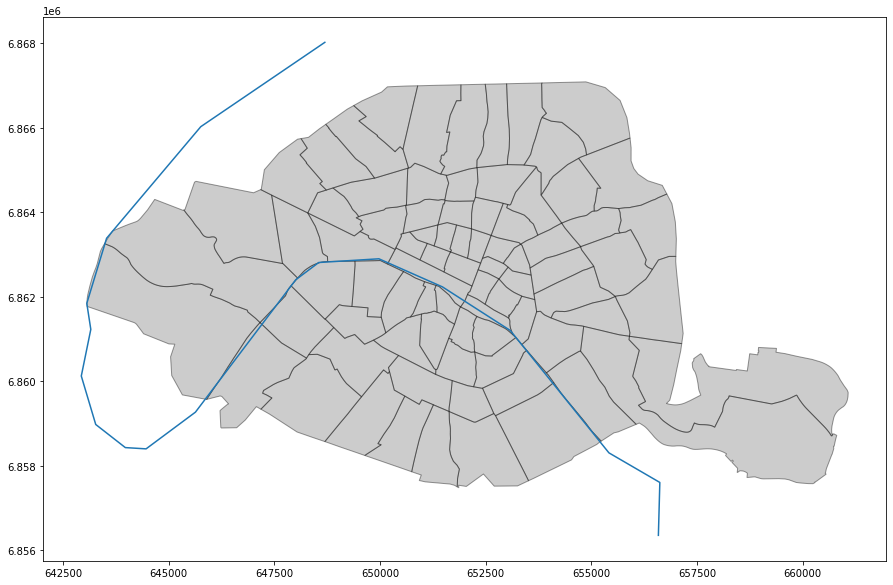

In [47]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 10))
districts.plot(ax=ax, color='grey', alpha=0.4, edgecolor='k')
s_seine_utm.plot(ax=ax)

In [48]:
seine = s_seine_utm.geometry.squeeze()

In [49]:
seine_buffer = seine.buffer(150)

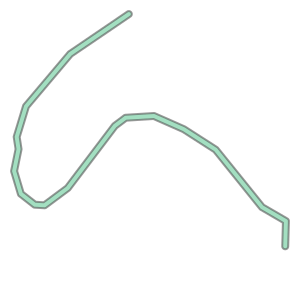

In [50]:
seine_buffer

In [51]:
districts_seine = districts[districts.intersects(seine_buffer)]

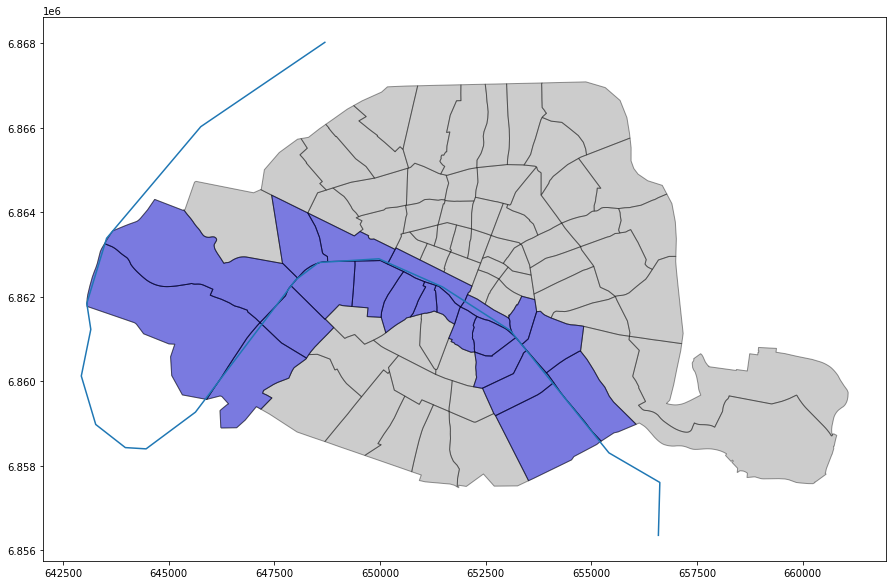

In [155]:
fig, ax = plt.subplots(figsize=(20, 10))
districts.plot(ax=ax, color='grey', alpha=0.4, edgecolor='k')
districts_seine.plot(ax=ax, color='blue', alpha=0.4, edgecolor='k')
s_seine_utm.plot(ax=ax)

### 04-spatial-joins

In [156]:
districts = geopandas.read_file("data/paris_districts.geojson").to_crs(epsg=2154)
stations = geopandas.read_file("data/paris_bike_stations.geojson").to_crs(epsg=2154)

In [157]:
joined = geopandas.sjoin(stations, districts[['district_name', 'geometry']], op='within')

In [158]:
joined.head()

,name,bike_stands,available_bikes,geometry,index_right,district_name
0,14002 - RASPAIL QUINET,44,4,POINT (650791.111 6860114.328),52,Montparnasse
143,14112 - FAUBOURG SAINT JACQUES CASSINI,16,0,POINT (651406.382 6859738.689),52,Montparnasse
293,14033 - DAGUERRE GASSENDI,38,1,POINT (650694.991 6859723.873),52,Montparnasse
346,14006 - SAINT JACQUES TOMBE ISSOIRE,22,0,POINT (651327.035 6859441.637),52,Montparnasse
429,14111 - DENFERT-ROCHEREAU CASSINI,24,8,POINT (651261.351 6859926.893),52,Montparnasse


In [159]:
trees = geopandas.read_file("data/paris_trees.gpkg")
districts = geopandas.read_file("data/paris_districts.geojson").to_crs(trees.crs)

In [160]:
trees.head()

,species,location_type,geometry
0,Marronnier,Alignement,POINT (455834.122 5410780.606)
1,Marronnier,Alignement,POINT (446546.284 5412574.697)
2,Marronnier,Alignement,POINT (449768.283 5409876.557)
3,Marronnier,Alignement,POINT (451779.708 5409292.071)
4,Sophora,Alignement,POINT (447041.361 5409756.712)


In [161]:
joined = geopandas.sjoin(trees, districts, op='within')
joined.head()

,species,location_type,geometry,index_right,id,district_name,population
0,Marronnier,Alignement,POINT (455834.122 5410780.606),43,44,Sainte-Marguerite,36476
130,Micocoulier,Alignement,POINT (455458.848 5411310.443),43,44,Sainte-Marguerite,36476
142,Platane,Alignement,POINT (455704.681 5410991.067),43,44,Sainte-Marguerite,36476
402,Cedrele,Alignement,POINT (455538.223 5411112.314),43,44,Sainte-Marguerite,36476
428,Micocoulier,Alignement,POINT (455487.563 5411285.863),43,44,Sainte-Marguerite,36476


In [162]:
trees_by_district = joined.groupby('district_name').size()

In [163]:
trees_by_district = trees_by_district.to_frame(name='n_trees')

In [164]:
trees_by_district.head()

,n_trees
district_name,
Amérique,183
Archives,8
Arsenal,60
Arts-et-Metiers,20
Auteuil,392


In [165]:
districts_trees = pd.merge(districts, trees_by_district, on='district_name')
districts_trees.head()

,id,district_name,population,geometry,n_trees
0,1,St-Germain-l'Auxerrois,1672,"POLYGON ((451922.133 5411438.484, 451922.080 5...",40
1,2,Halles,8984,"POLYGON ((452278.419 5412160.893, 452192.407 5...",40
2,3,Palais-Royal,3195,"POLYGON ((451553.806 5412340.522, 451528.058 5...",4
3,4,Place-Vendôme,3044,"POLYGON ((451004.908 5412654.095, 450960.640 5...",7
4,5,Gaillon,1345,"POLYGON ((451328.752 5412991.278, 451294.721 5...",7


In [166]:
districts_trees['n_trees_per_area'] = districts_trees['n_trees'] / districts_trees.geometry.area

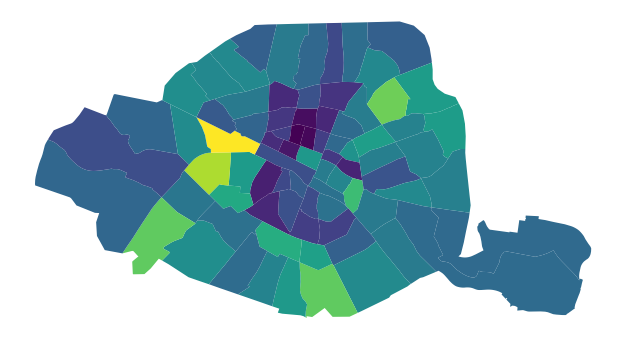

In [167]:
ax = districts_trees.plot(column='n_trees_per_area', figsize=(12, 6))
ax.set_axis_off()

#### Part 2

In [168]:
land_use = geopandas.read_file("zip://./data/paris_land_use.zip")
land_use.head()

,class,geometry
0,Water bodies,"POLYGON ((3751386.281 2890064.323, 3751395.345..."
1,Roads and associated land,"POLYGON ((3751390.345 2886000.000, 3751390.345..."
2,Roads and associated land,"POLYGON ((3751390.345 2886898.192, 3751390.370..."
3,Roads and associated land,"POLYGON ((3751390.345 2887500.000, 3751390.345..."
4,Roads and associated land,"POLYGON ((3751390.345 2888647.357, 3751390.370..."


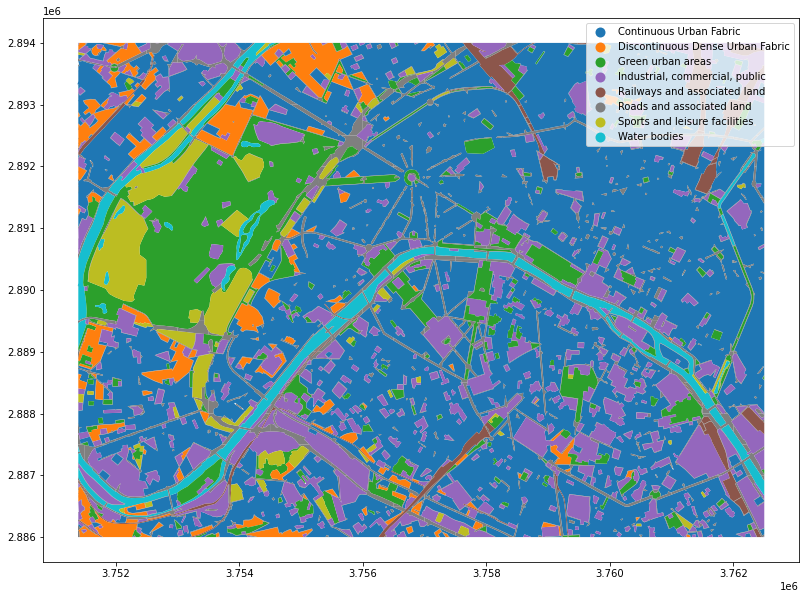

In [169]:
land_use.plot(column='class', legend=True, figsize=(15, 10))

In [170]:
land_use['area'] = land_use.geometry.area

In [171]:
total_area = land_use.groupby('class')['area'].sum() / 1000**2
total_area

class
Continuous Urban Fabric             45.943090
Discontinuous Dense Urban Fabric     3.657343
Green urban areas                    9.858438
Industrial, commercial, public      13.295042
Railways and associated land         1.935793
Roads and associated land            7.401574
Sports and leisure facilities        3.578509
Water bodies                         3.189706
Name: area, dtype: float64

In [172]:
land_use = geopandas.read_file("zip://./data/paris_land_use.zip")
districts = geopandas.read_file("data/paris_districts.geojson").to_crs(land_use.crs)

In [173]:
land_use['area'] = land_use.geometry.area
park_boulogne = land_use[land_use['class'] == "Green urban areas"].sort_values('area').geometry.iloc[-1]
muette = districts[districts.district_name == 'Muette'].geometry.squeeze()

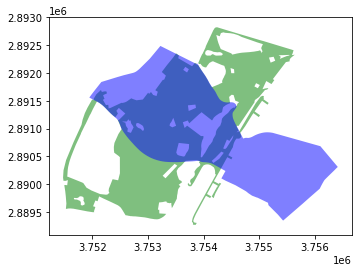

In [174]:
geopandas.GeoSeries([park_boulogne, muette]).plot(alpha=0.5, color=['green', 'blue'])

In [175]:
intersection = park_boulogne.intersection(muette)

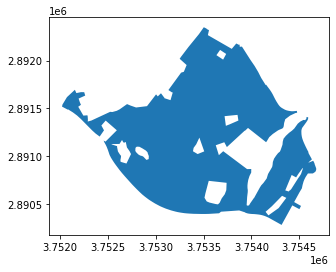

In [176]:
geopandas.GeoSeries([intersection]).plot()

In [177]:
print(intersection.area / muette.area)

0.4352082235640955


In [178]:
land_use = geopandas.read_file("zip://./data/paris_land_use.zip")
districts = geopandas.read_file("data/paris_districts.geojson").to_crs(land_use.crs)
muette = districts[districts.district_name == 'Muette'].geometry.squeeze()

In [179]:
land_use_muette = land_use.geometry.intersection(muette)

In [181]:
land_use_muette = land_use.copy()
land_use_muette['geometry'] = land_use.geometry.intersection(muette)
land_use_muette = land_use_muette[~land_use_muette.is_empty]
land_use_muette.head()

,class,geometry
135,Green urban areas,"POLYGON ((3752020.694 2891519.323, 3752025.310..."
229,Sports and leisure facilities,"POLYGON ((3752443.986 2891171.823, 3752446.430..."
239,Water bodies,"POLYGON ((3752110.034 2891774.197, 3752112.444..."
278,Roads and associated land,"POLYGON ((3752000.000 2891530.298, 3752000.000..."
279,Roads and associated land,"POLYGON ((3751954.462 2891571.778, 3752000.000..."


In [182]:
land_use_muette.dissolve(by='class')

,geometry
class,
Continuous Urban Fabric,"MULTIPOLYGON (((3755334.091 2889457.833, 37553..."
Discontinuous Dense Urban Fabric,"MULTIPOLYGON (((3755585.963 2889793.822, 37556..."
Green urban areas,"MULTIPOLYGON (((3755772.518 2889995.038, 37558..."
"Industrial, commercial, public","MULTIPOLYGON (((3755275.182 2889527.443, 37552..."
Railways and associated land,"POLYGON ((3755654.921 2889540.054, 3755560.618..."
Roads and associated land,"MULTIPOLYGON (((3754820.067 2889843.877, 37548..."
Sports and leisure facilities,"MULTIPOLYGON (((3753932.354 2891267.190, 37539..."
Water bodies,"MULTIPOLYGON (((3755507.459 2889412.262, 37555..."


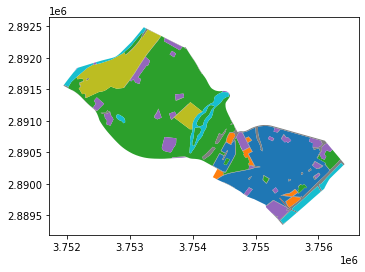

In [183]:
land_use_muette.dissolve(by='class').reset_index().plot(column='class')